# 2025-07-06 Data Hack

## Aufgabe
Übergewicht vorhersagen -> eigene Spalte

### imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Import Data, Visualization & Feature Engineering

In [2]:
all_data = pd.read_csv('data/train.csv')

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
all_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
all_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
all_data.isna().any().any()

False

In [7]:
all_data["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [8]:
def extend_data_set(data_set: pd.DataFrame):
    data_set["BMI"] = data_set["Weight"] / data_set["Height"] ** 2
    data_set = pd.get_dummies(data_set, columns=["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"])
    return data_set
all_data = extend_data_set(all_data)
all_data.head(10)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,...,True,False,False,True,False,False,False,False,True,False
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,...,True,False,False,False,True,True,False,False,False,False
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,...,True,False,False,False,True,False,False,False,True,False
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,...,True,False,False,True,False,False,False,False,True,False
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,...,True,False,False,True,False,False,False,False,True,False
5,5,18.128249,1.748524,51.552595,2.919751,3.000000,2.137550,1.930033,1.000000,Insufficient_Weight,...,True,False,False,True,False,False,False,False,True,False
6,6,29.883021,1.754711,112.725005,1.991240,3.000000,2.000000,0.000000,0.696948,Obesity_Type_II,...,True,False,False,True,False,True,False,False,False,False
7,7,29.891473,1.750150,118.206565,1.397468,3.000000,2.000000,0.598655,0.000000,Obesity_Type_II,...,True,False,False,True,False,True,False,False,False,False
8,8,17.000000,1.700000,70.000000,2.000000,3.000000,3.000000,1.000000,1.000000,Overweight_Level_I,...,False,True,False,False,True,False,False,False,True,False
9,9,26.000000,1.638836,111.275646,3.000000,3.000000,2.632253,0.000000,0.218645,Obesity_Type_III,...,True,False,False,True,False,False,False,False,True,False


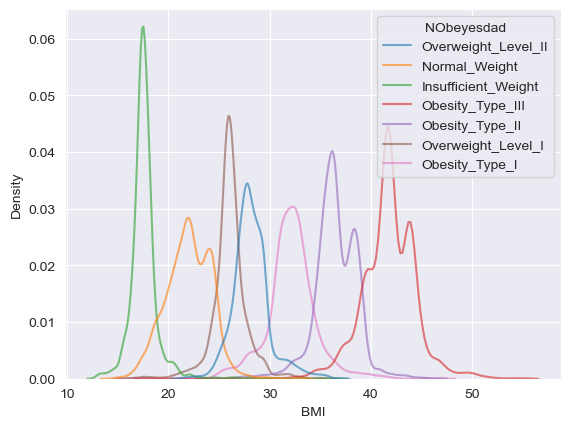

In [9]:
sns.kdeplot(all_data, x="BMI", hue="NObeyesdad", alpha=0.6)
plt.show()

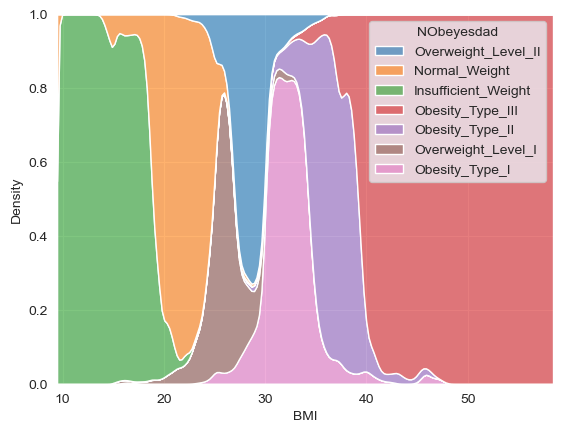

In [10]:
sns.kdeplot(all_data, x="BMI", hue="NObeyesdad", multiple="fill", alpha=0.6)
plt.show()

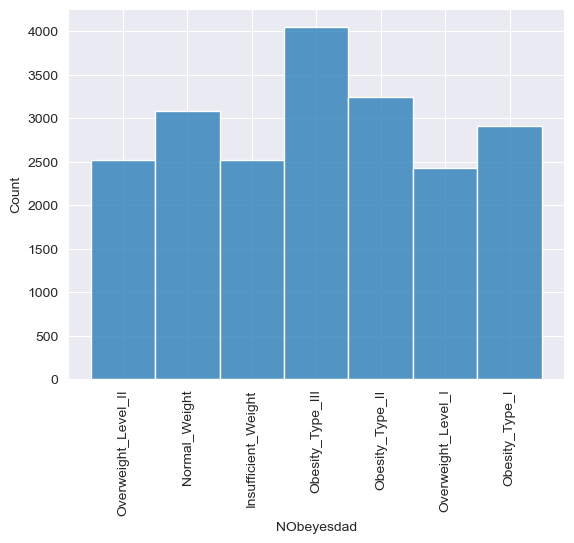

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(all_data["NObeyesdad"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Height', ylabel='Weight'>

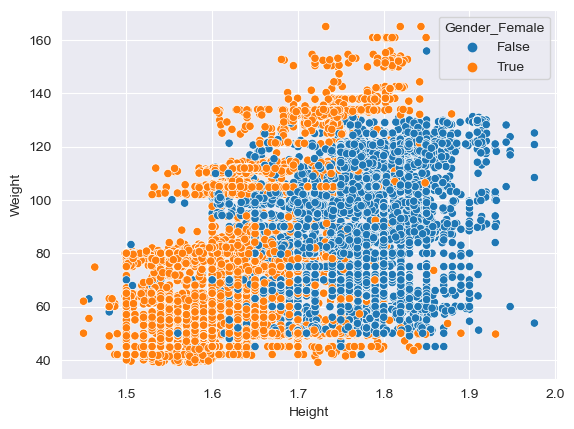

In [13]:
sns.scatterplot(x=all_data["Height"], y=all_data["Weight"], hue=all_data["Gender_Female"])

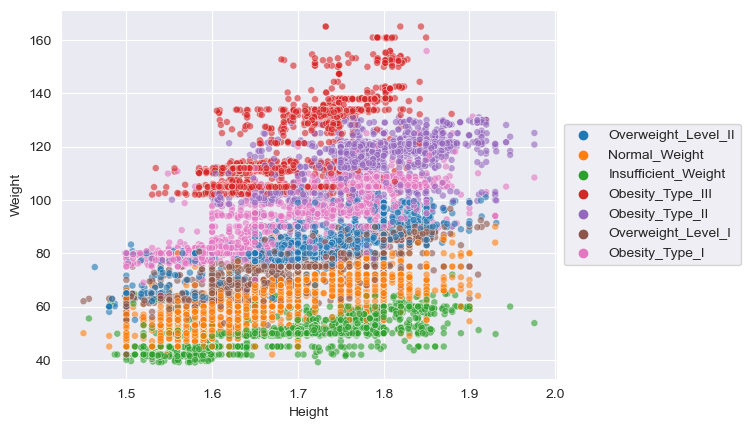

In [14]:
sns.scatterplot(x=all_data["Height"], y=all_data["Weight"], hue=all_data["NObeyesdad"],s=25, alpha=0.6),
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)),
plt.show()

## Split train, test

In [15]:
train_X, test_X, train_y, test_y = train_test_split(all_data.drop(columns=["NObeyesdad"]), all_data["NObeyesdad"], test_size=0.2, random_state=42)

In [16]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16606 entries, 9958 to 15795
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  16606 non-null  int64  
 1   Age                                 16606 non-null  float64
 2   Height                              16606 non-null  float64
 3   Weight                              16606 non-null  float64
 4   FCVC                                16606 non-null  float64
 5   NCP                                 16606 non-null  float64
 6   CH2O                                16606 non-null  float64
 7   FAF                                 16606 non-null  float64
 8   TUE                                 16606 non-null  float64
 9   BMI                                 16606 non-null  float64
 10  Gender_Female                       16606 non-null  bool   
 11  Gender_Male                         16606 n

In [17]:
train_y.info()

<class 'pandas.core.series.Series'>
Index: 16606 entries, 9958 to 15795
Series name: NObeyesdad
Non-Null Count  Dtype 
--------------  ----- 
16606 non-null  object
dtypes: object(1)
memory usage: 259.5+ KB


## Fit DecisionTreeClassifier

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

results = cross_validate(DecisionTreeClassifier(), train_X, train_y, cv=5, scoring="accuracy")
results = pd.DataFrame(results)
results

,fit_time,score_time,test_score
0,0.107801,0.002964,0.823299
1,0.114179,0.002927,0.829871
2,0.105147,0.003009,0.839807
3,0.108336,0.003024,0.836796
4,0.109079,0.002961,0.846432


0.8263094521372667


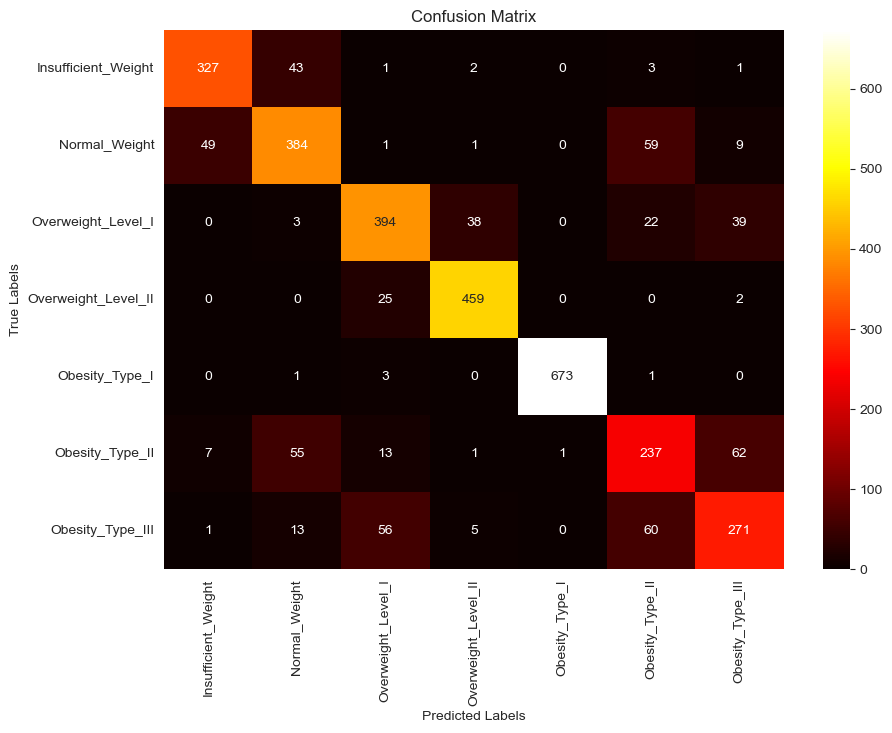

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_small_X, validate_X, train_small_y, validate_y = train_test_split(train_X, train_y, random_state=42, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(train_small_X, train_small_y)
pred_validate_y = model.predict(validate_X)
print(model.score(validate_X, validate_y))

ordered_labels = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

def print_confusion_matrix(pred_y, true_y, classes):
    conf_matrix = confusion_matrix(pred_y, true_y, labels=classes)
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", xticklabels=ordered_labels, yticklabels=ordered_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

print_confusion_matrix(pred_validate_y, validate_y, model.classes_)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("model", DecisionTreeClassifier(random_state=42))
])

param_grid = [
    {
        "model__max_depth": [2, 4, 6, 8, 10, 15, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
    },
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(train_small_X, train_small_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'model__max_depth': [2, 4, 6, 8, 10, 15, 20],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10]}],
             scoring='accuracy')

In [21]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.058361,0.000248,0.002337,0.000025,10,1,2,"{'model__max_depth': 10, 'model__min_samples_l...",0.867896,0.871660,0.872789,0.869778,0.870105,0.870446,0.001675,1
38,0.058341,0.000222,0.002374,0.000049,10,1,10,"{'model__max_depth': 10, 'model__min_samples_l...",0.866767,0.876176,0.871660,0.867896,0.865211,0.869542,0.003941,2
40,0.059007,0.002149,0.002368,0.000086,10,2,5,"{'model__max_depth': 10, 'model__min_samples_l...",0.869025,0.872412,0.872789,0.868272,0.865211,0.869542,0.002808,2
37,0.058999,0.000421,0.002505,0.000104,10,1,5,"{'model__max_depth': 10, 'model__min_samples_l...",0.864509,0.872789,0.873165,0.868649,0.868223,0.869467,0.003210,4
41,0.058899,0.001766,0.002544,0.000164,10,2,10,"{'model__max_depth': 10, 'model__min_samples_l...",0.867143,0.873918,0.872789,0.869025,0.862575,0.869090,0.004080,5


In [22]:
grid_search.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [23]:
pred_y = grid_search.best_estimator_.predict(validate_X)

In [24]:
grid_search.best_estimator_.score(validate_X, validate_y)

0.8705599036724865

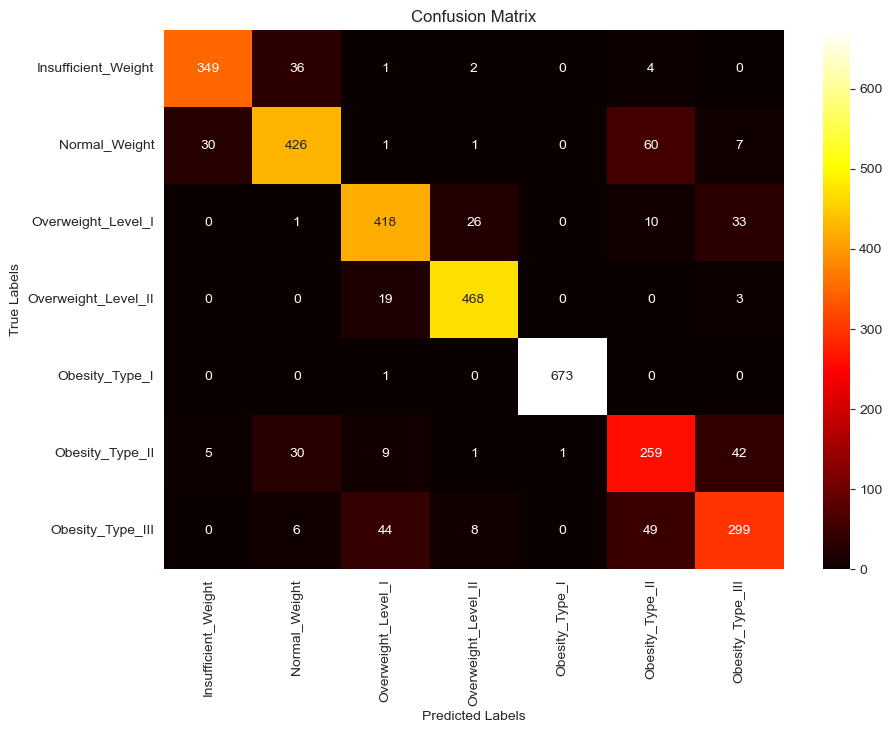

In [25]:
print_confusion_matrix(pred_y, validate_y, grid_search.best_estimator_.classes_)

## Fit RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ("model", RandomForestClassifier(random_state=42))
])

rf_param_grid = [
    {
        "model__n_estimators": [100, 200, 300],
    },
]

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring="accuracy")
rf_grid_search.fit(train_small_X, train_small_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'model__n_estimators': [100, 200, 300]}],
             scoring='accuracy')

In [27]:
rf_cv_res = pd.DataFrame(rf_grid_search.cv_results_)
rf_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rf_cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.920454,0.019609,0.064141,0.000389,200,{'model__n_estimators': 200},0.894618,0.903274,0.898382,0.901016,0.896084,0.898675,0.003159,1
2,2.903044,0.017188,0.096269,0.001760,300,{'model__n_estimators': 300},0.895371,0.902898,0.896500,0.900263,0.896084,0.898223,0.002888,2
0,0.960233,0.007790,0.033980,0.000539,100,{'model__n_estimators': 100},0.895747,0.902898,0.898382,0.898758,0.894955,0.898148,0.002791,3


In [28]:
rf_pred_y = rf_grid_search.best_estimator_.predict(validate_X)

In [29]:
rf_grid_search.best_estimator_.score(validate_X, validate_y)

0.9021673690547862

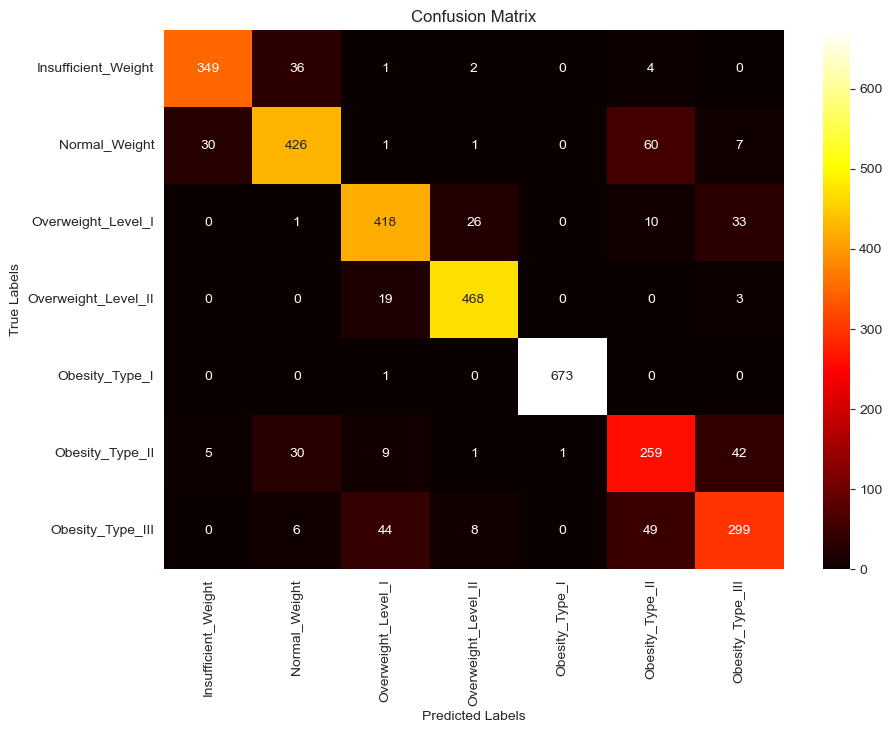

In [30]:
print_confusion_matrix(pred_y, validate_y, grid_search.best_estimator_.classes_)

In [31]:
feature_importances = pd.DataFrame(rf_grid_search.best_estimator_["model"].feature_importances_,
                                   index = train_small_X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
BMI,0.271850
Weight,0.228111
Age,0.068197
Height,0.056637
FCVC,0.055036
Gender_Male,0.036946
Gender_Female,0.036580
CH2O,0.031016
TUE,0.027754
id,0.027551


In [32]:
test_pred_y = rf_grid_search.best_estimator_.predict(test_X)
rf_grid_search.best_estimator_.score(test_X, test_y)

0.9007707129094412

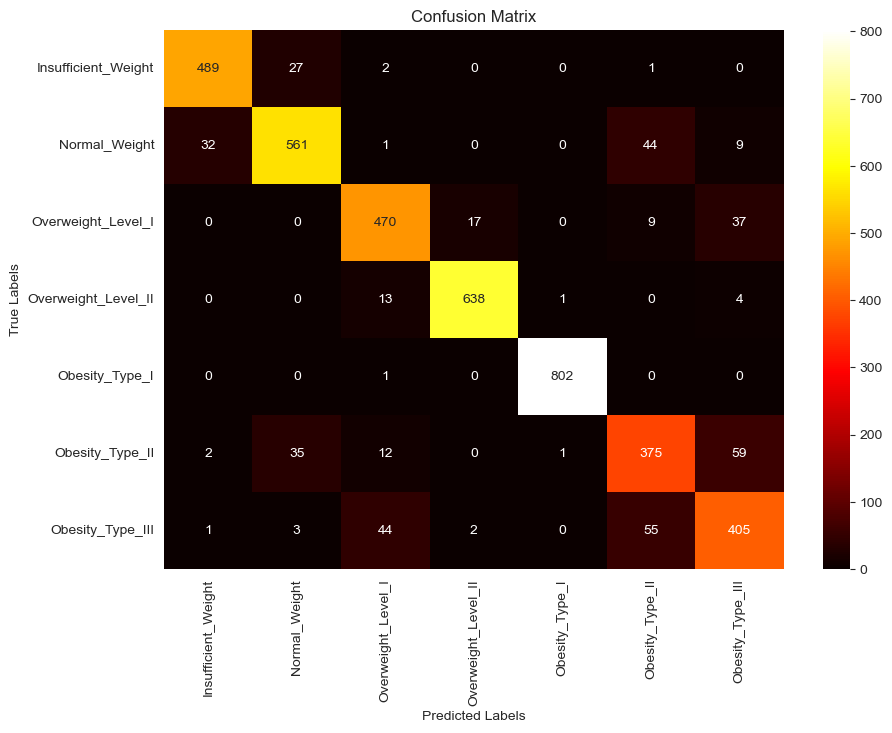

In [33]:
print_confusion_matrix(test_pred_y, test_y, grid_search.best_estimator_.classes_)

## Work on Kaggle Test data and store predictions

In [34]:
kaggle_X = pd.read_csv("data/test.csv")
kaggle_X = extend_data_set(kaggle_X)
# We drop the column "CALC_Always" since we never saw this in our training or validation data sets
kaggle_pred_y = rf_grid_search.best_estimator_.predict(kaggle_X.drop(columns=["CALC_Always"])) 
kaggle_pred_df = pd.DataFrame(kaggle_pred_y, columns=['PredictedLabel'])
kaggle_pred_df_with_id = pd.concat([kaggle_X['id'], kaggle_pred_df], axis=1)
kaggle_pred_df_with_id.to_csv('data/kaggle_predictions.csv', index=False)